# Exercise 4-1: Create some Seaborn plots

## Get the data

In [9]:
import pandas as pd
# Note: The following import is used to avoid warnings related to seaborn
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

data_dir = '../../data'

In [10]:
awards_summary_df = pd.read_pickle(f'{data_dir}/pkl_files/awards_summary_diryr_df.pkl')
awards_summary_df.head()

,awd_year,dir_abbr,awd_count,sum_awd_amount
0,2008,CSE,3,463433.0
1,2008,ENG,1,300000.0
2,2008,GEO,1,64257.0
3,2008,MPS,1,113753.0
4,2008,SBE,3,623175.0


In [11]:
# Use pivot() to make a wide format DataFrame
# with awd_years as rows, directorate abbreviations as columns,
# and award counts as values
awards_wide_df = awards_summary_df.pivot(index='awd_year',columns='dir_abbr',values='awd_count')
awards_wide_df.head()

dir_abbr,BFA,BIO,CSE,EDU,ENG,GEO,IRM,MPS,NCO,NNCO,NSB,O/D,OCIO,OPP,SBE,TIP
awd_year,,,,,,,,,,,,,,,,
2008,NaN,NaN,3.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2009,NaN,81.0,56.0,29.0,65.0,59.0,2.0,112.0,NaN,NaN,NaN,3.0,NaN,NaN,38.0,1.0
2010,12.0,1535.0,1789.0,1139.0,1777.0,2027.0,12.0,2771.0,NaN,NaN,1.0,497.0,NaN,NaN,1308.0,615.0
2011,5.0,1433.0,1598.0,1023.0,1726.0,1770.0,8.0,2434.0,NaN,NaN,7.0,418.0,NaN,NaN,1048.0,482.0
2012,5.0,1323.0,1810.0,1052.0,1788.0,1732.0,7.0,2653.0,NaN,NaN,10.0,355.0,NaN,NaN,1061.0,510.0


### Update the dataframes for this exercise

## The basic Seaborn parameters

In [12]:
import seaborn as sns

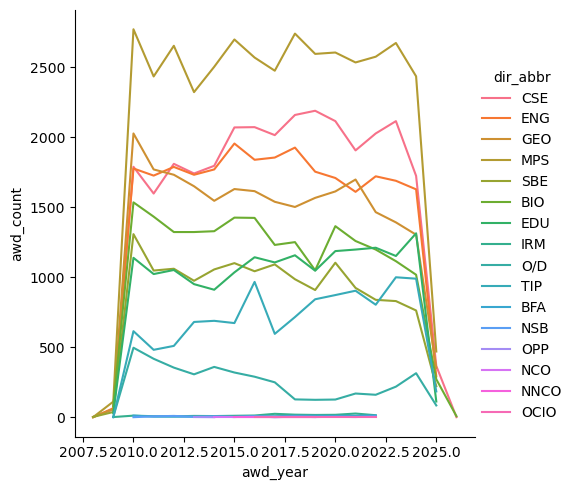

In [13]:
sns.relplot(data=awards_summary_df, kind='line',
            x='awd_year', y='awd_count', hue='dir_abbr')

<Axes: xlabel='awd_year', ylabel='awd_count'>

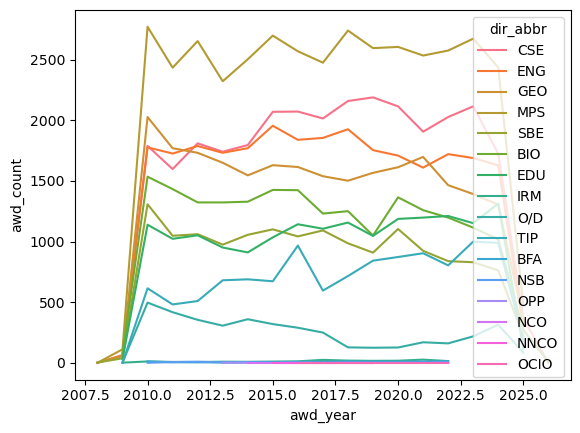

In [14]:
sns.lineplot(data=awards_summary_df, 
             x='awd_year', y='awd_count', hue='dir_abbr')

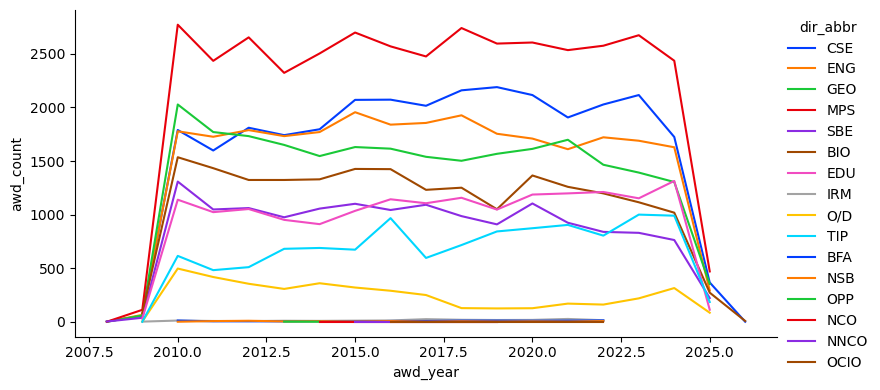

In [15]:
sns.relplot(data=awards_summary_df, kind='line',
            x='awd_year', y='awd_count', hue='dir_abbr', palette='bright',
            height=4, aspect=2)

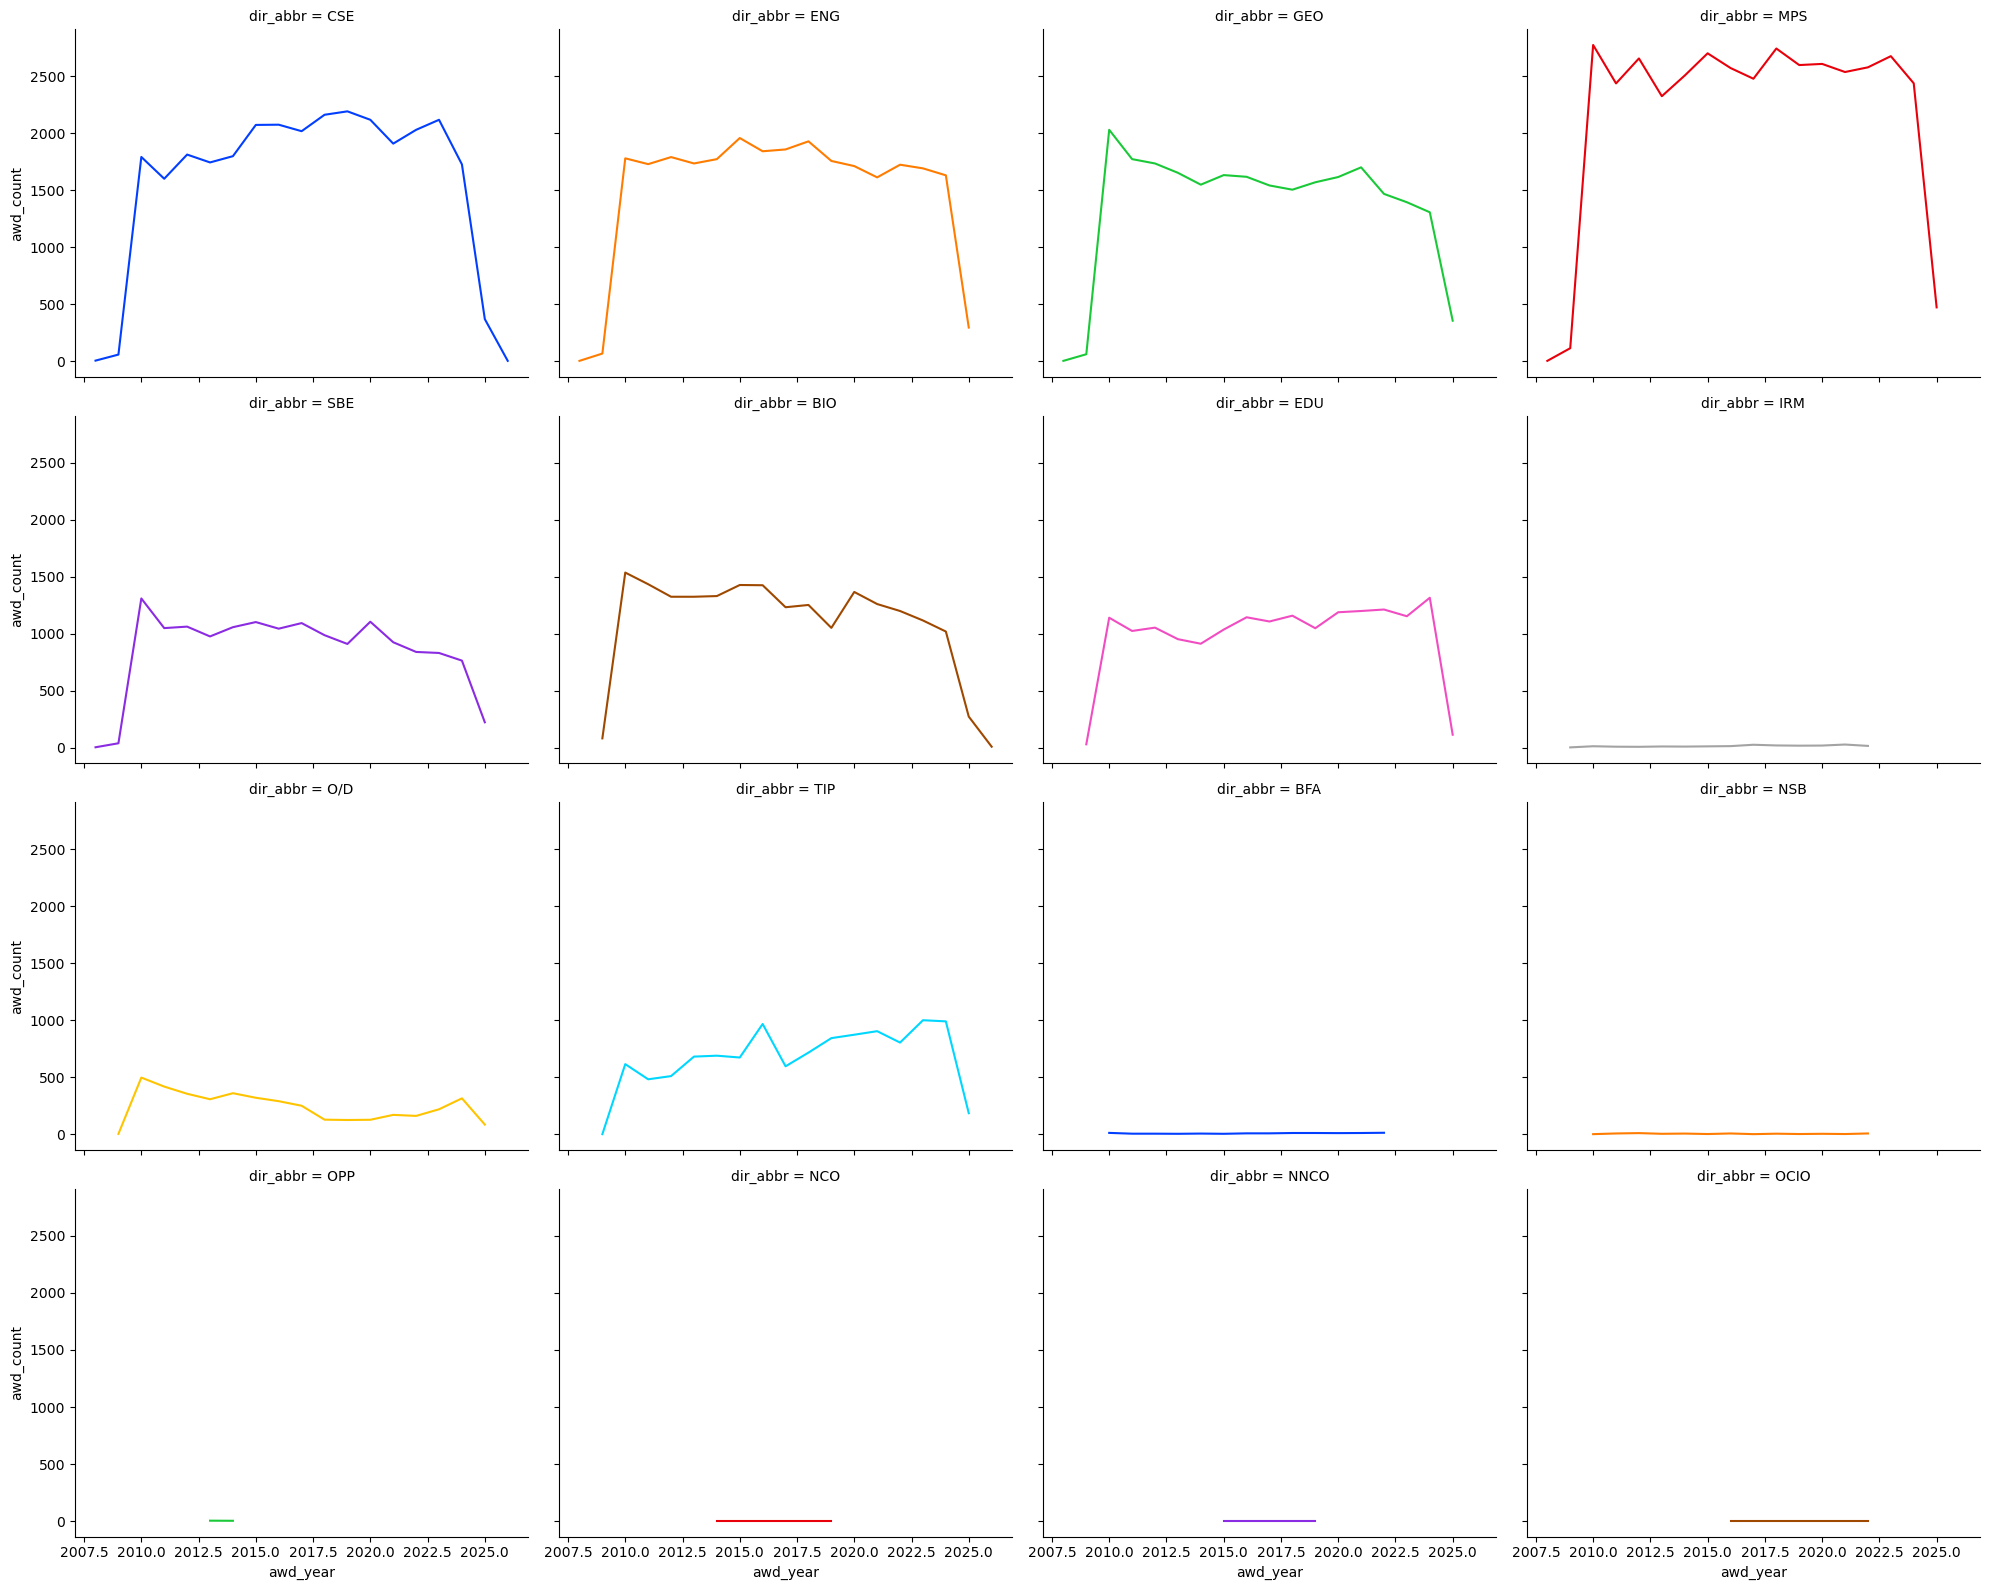

In [16]:
sns.relplot(data=awards_summary_df, kind='line',
            x='awd_year', y='awd_count', hue='dir_abbr', palette='bright',
            height=4, aspect=1.25, 
            col='dir_abbr', col_wrap=4, legend=False)

## Enhancing plots

[Text(0.5, 1.0, 'Awards by Directorate'),
 Text(0, 0.5, '# of Awards'),
 Text(0.5, 0, 'awd_year')]

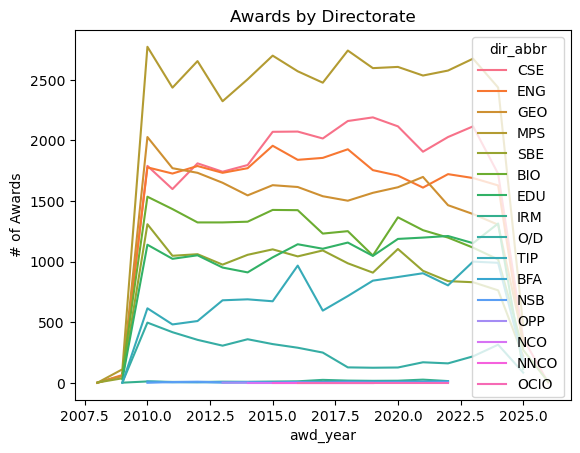

In [17]:
ax = sns.lineplot(data=awards_summary_df, 
             x='awd_year', y='awd_count', hue='dir_abbr')
ax.set(title='Awards by Directorate', ylabel='# of Awards', xlabel='awd_year')

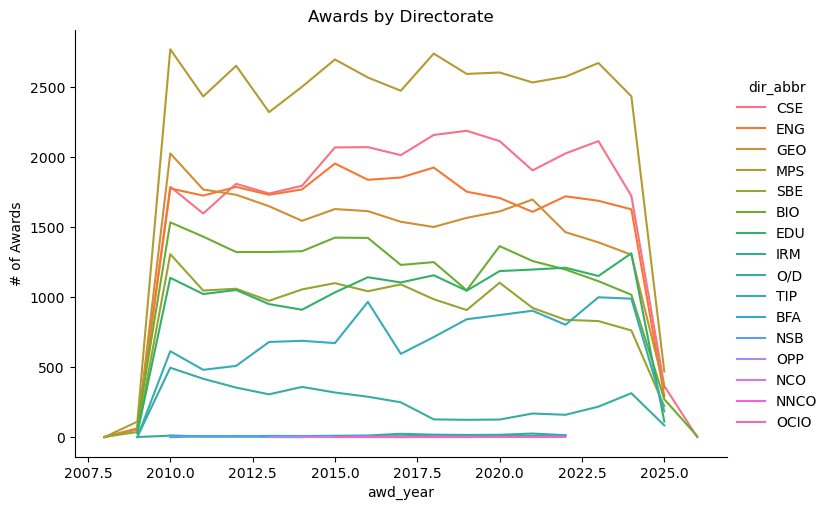

In [18]:
g = sns.relplot(data=awards_summary_df, kind='line',
    x='awd_year', y='awd_count', hue='dir_abbr', aspect=1.5)
for ax in g.axes.flat:
    ax.set(title='Awards by Directorate', ylabel='# of Awards')

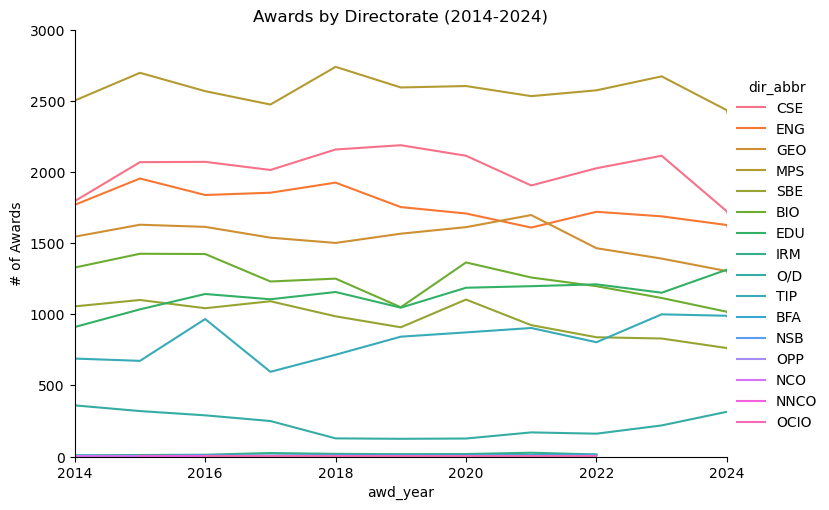

In [19]:
g = sns.relplot(data=awards_summary_df, kind='line',
    x='awd_year', y='awd_count', hue='dir_abbr', aspect=1.5)
for ax in g.axes.flat:
    ax.set(title='Awards by Directorate (2014-2024)', ylabel='# of Awards', xlabel='awd_year',
        xticks=[x for x in range(2014, 2025, 2)], 
        xlim=(2014,2024), ylim=(0,3000))

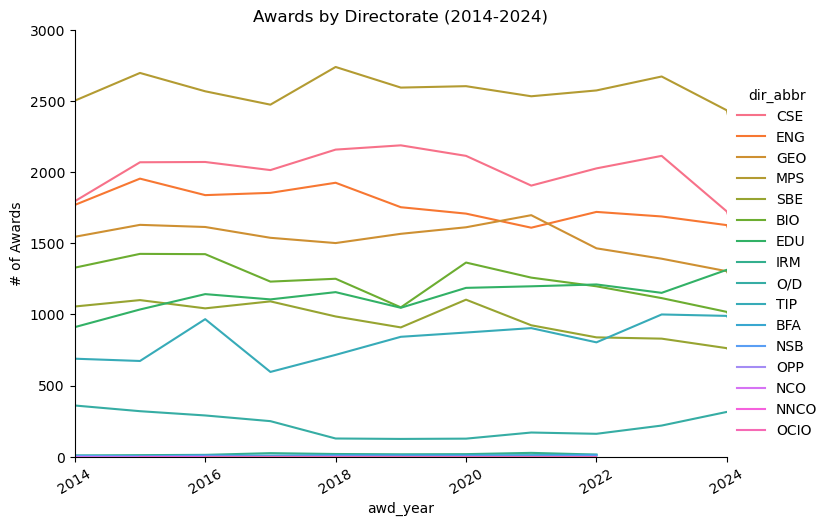

In [20]:
g = sns.relplot(data=awards_summary_df, kind='line',
    x='awd_year', y='awd_count', hue='dir_abbr', aspect=1.5)
for ax in g.axes.flat:
    ax.set(title='Awards by Directorate (2014-2024)', ylabel='# of Awards', xlabel='awd_year',
        xticks=[x for x in range(2014, 2025, 2)], 
        xlim=(2014,2024), ylim=(0,3000))
ax.tick_params('x', labelrotation=30)

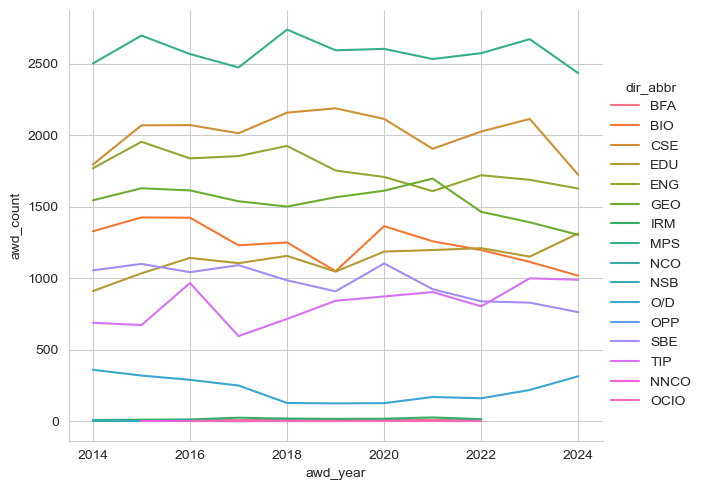

In [21]:
sns.set_style('whitegrid')
sns.relplot(data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'),
    kind='line', x='awd_year', y='awd_count', hue='dir_abbr', aspect=1.25)

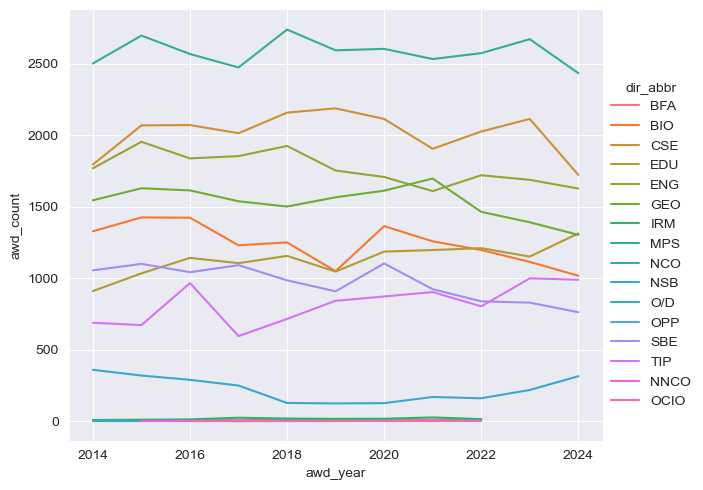

In [22]:
sns.set_style('darkgrid')
sns.relplot(data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'),
    kind='line', x='awd_year', y='awd_count', hue='dir_abbr', aspect=1.25)

In [23]:
sns.set_style('ticks')

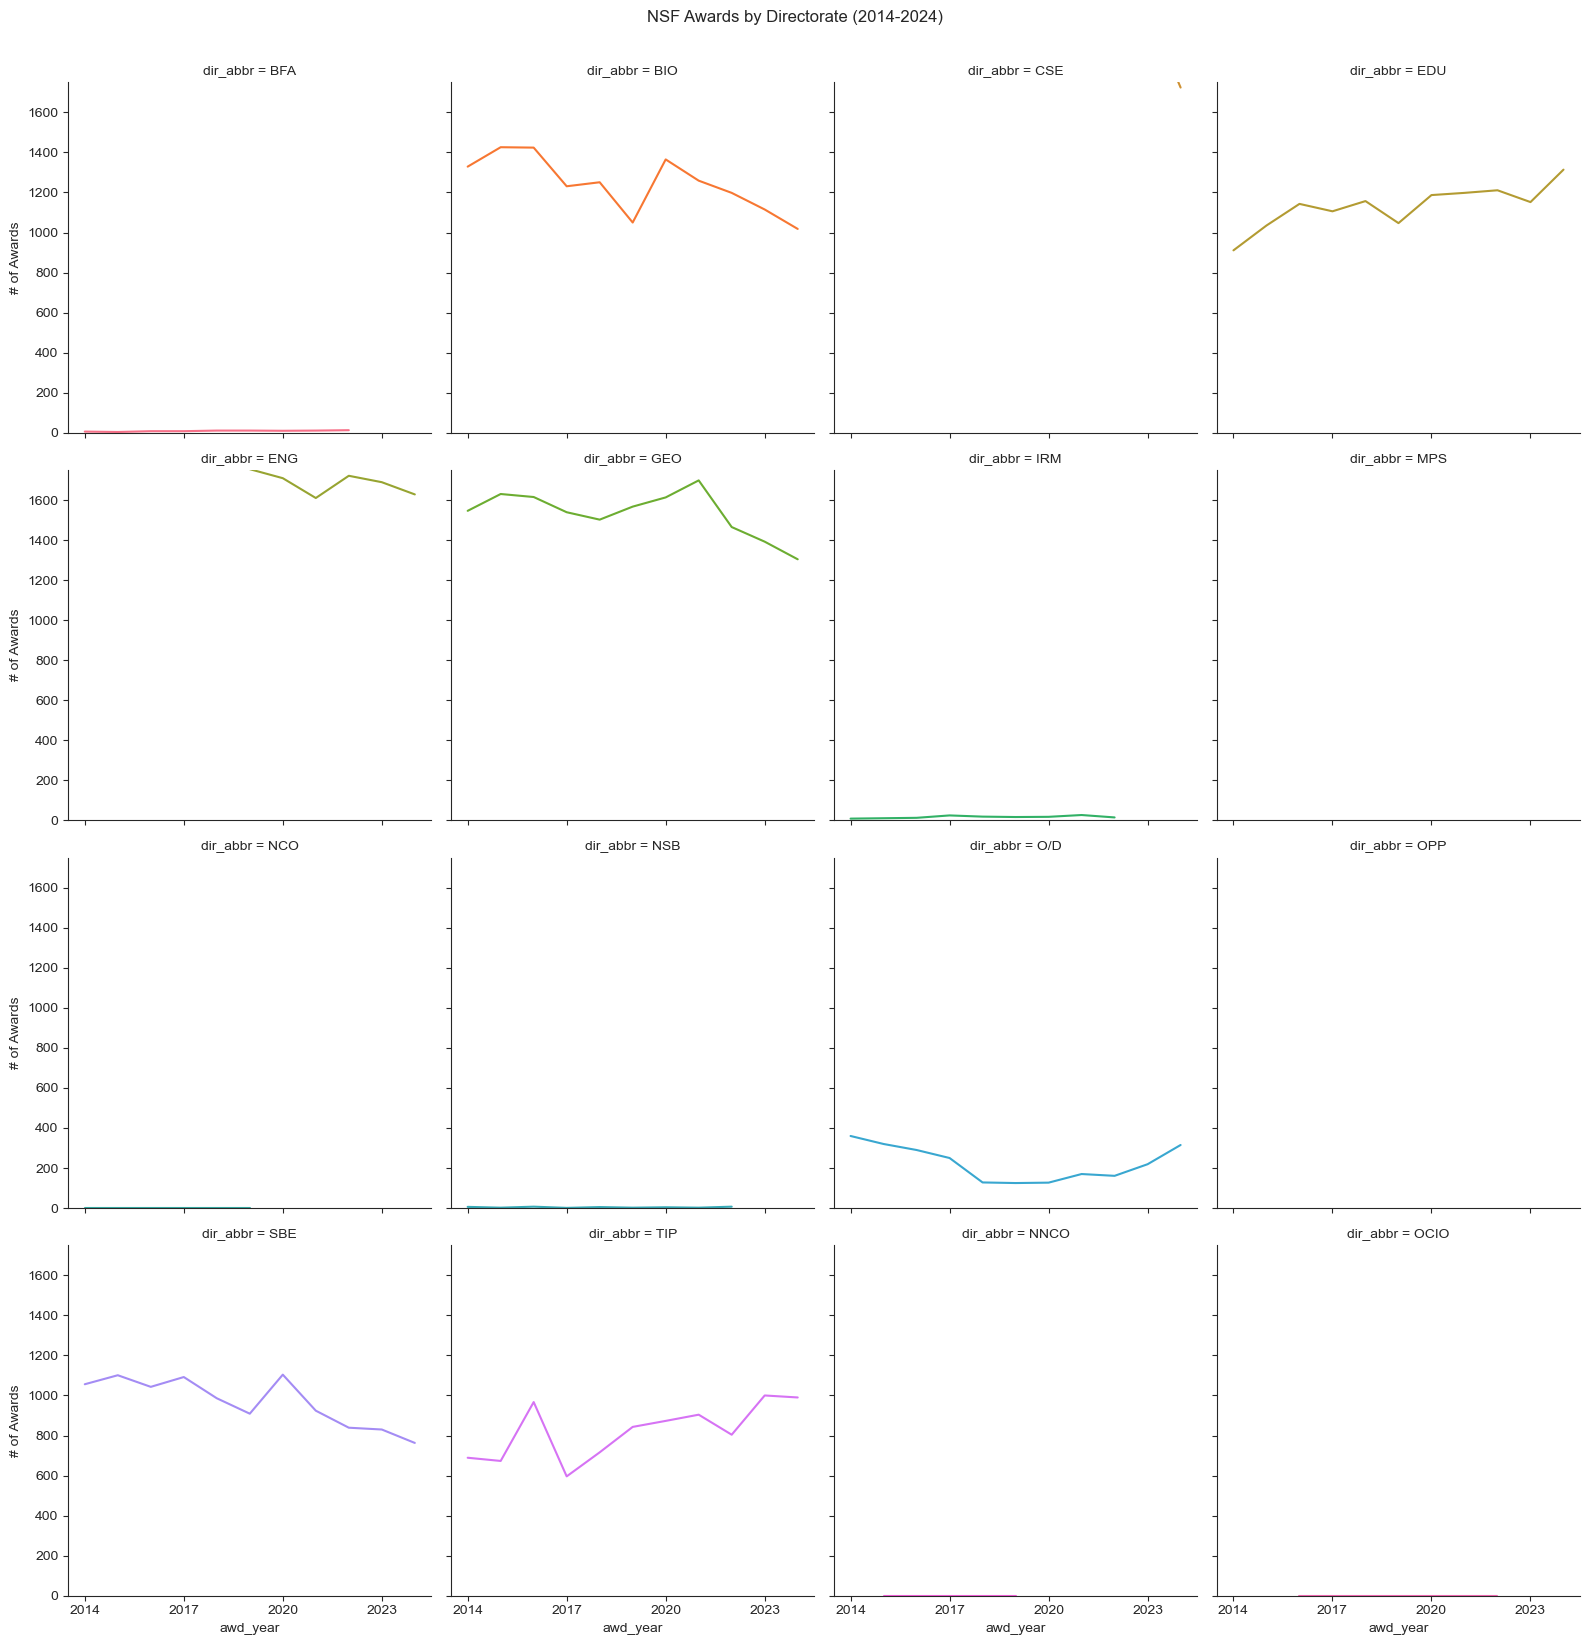

In [24]:
g = sns.relplot(data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'),
    kind='line', x='awd_year', y='awd_count', hue='dir_abbr', legend=False,
    col='dir_abbr', col_wrap=4, height=4)
g.fig.suptitle('NSF Awards by Directorate (2014-2024)', y=1.025)
g.set(ylabel='# of Awards', 
      xticks=[x for x in range(2014,2025,3)], 
      ylim=(0,1750))

## Relational plots

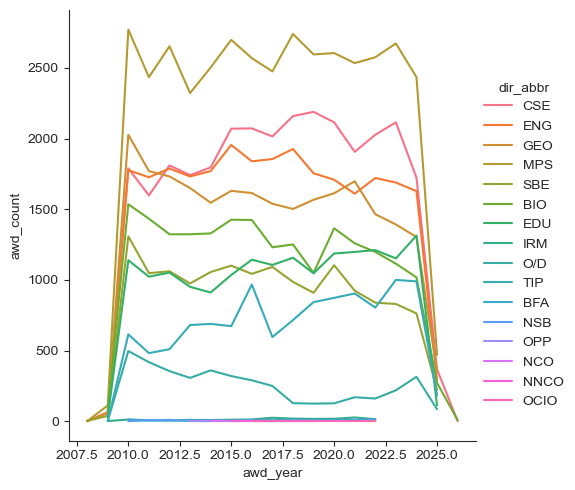

In [25]:
sns.relplot(data=awards_summary_df, kind='line', x='awd_year', y='awd_count', hue='dir_abbr')

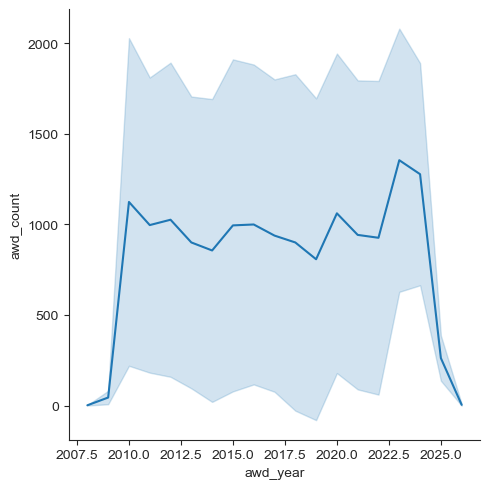

In [26]:
sns.relplot(data=awards_summary_df, kind='line', x='awd_year', y='awd_count', errorbar='sd')

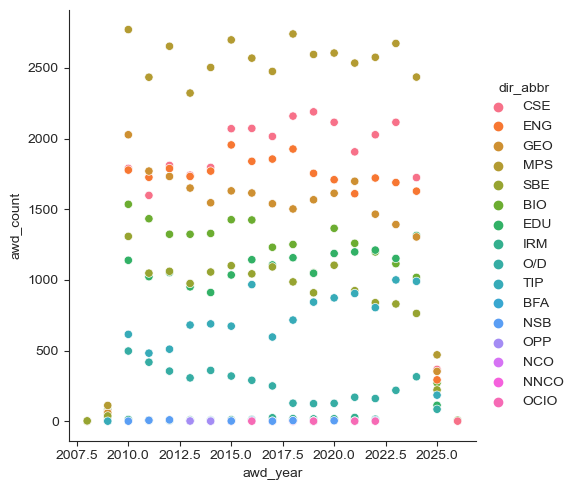

In [27]:
sns.relplot(data=awards_summary_df, kind='scatter', x='awd_year', y='awd_count', hue='dir_abbr')

[[<matplotlib.axis.XTick at 0x1e1af3085d0>,

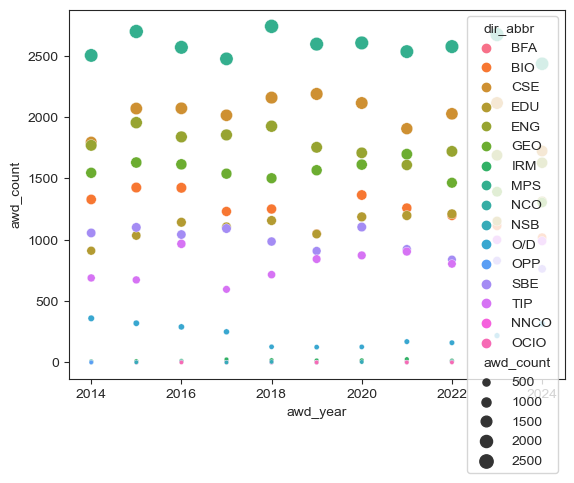

In [28]:
a = sns.scatterplot(data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'), 
    x='awd_year', y='awd_count', hue='dir_abbr', 
    size='awd_count', sizes=(10,100))
ax.set(xticks=[x for x in range(2014,2025,2)])

## Categorical plots

<Axes: xlabel='awd_year', ylabel='awd_count'>

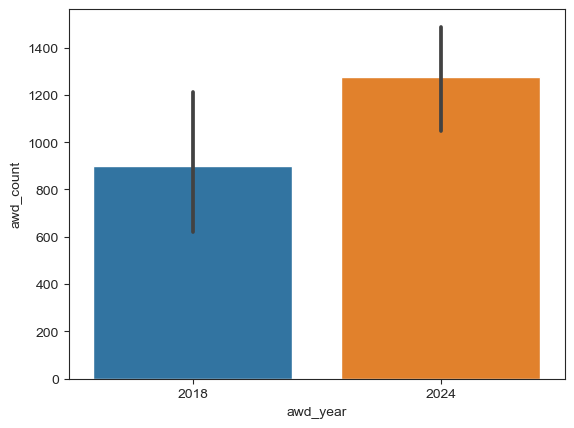

In [29]:
sns.barplot(data=awards_summary_df.query('awd_year in (2018,2024)'), 
            x='awd_year', y='awd_count', errorbar=('ci',75) )

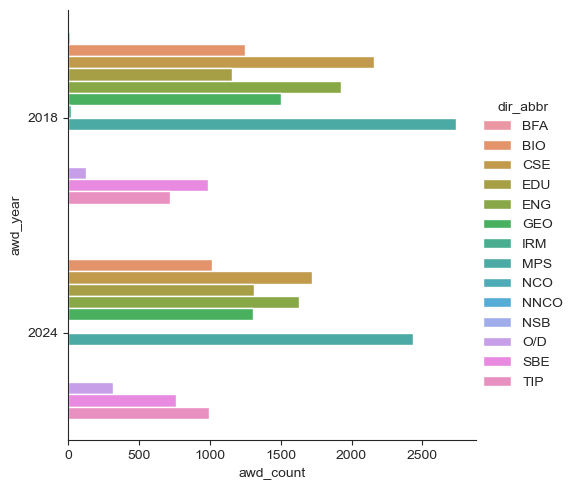

In [30]:
sns.catplot(data=awards_summary_df.query('awd_year in (2018,2024)'), 
            kind='bar', x='awd_count', y='awd_year', hue='dir_abbr', orient='h')

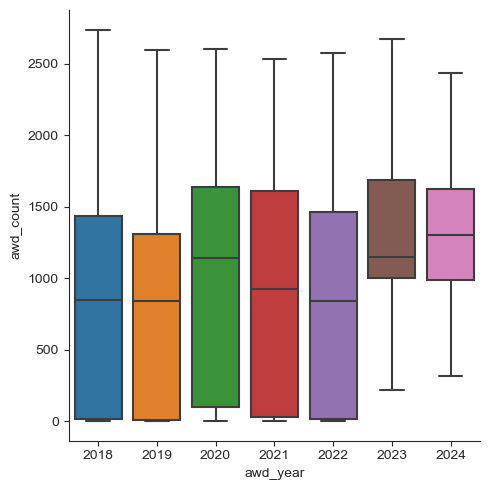

In [31]:
sns.catplot(data=awards_summary_df.query('awd_year >= 2018 and awd_year <= 2024'), 
            kind='box', x='awd_year', y='awd_count')

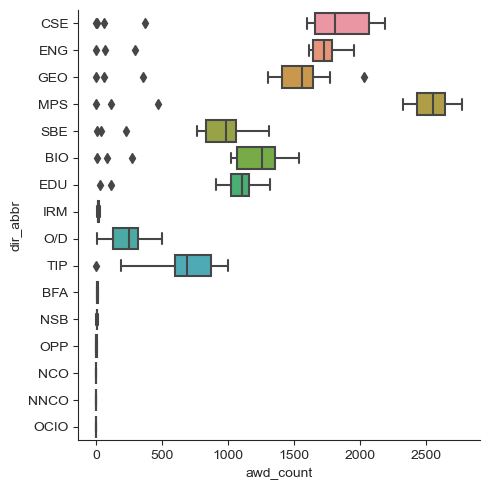

In [32]:
sns.catplot(data=awards_summary_df,
            kind='box', x='awd_count', y='dir_abbr', orient='h')

## Distribution plots

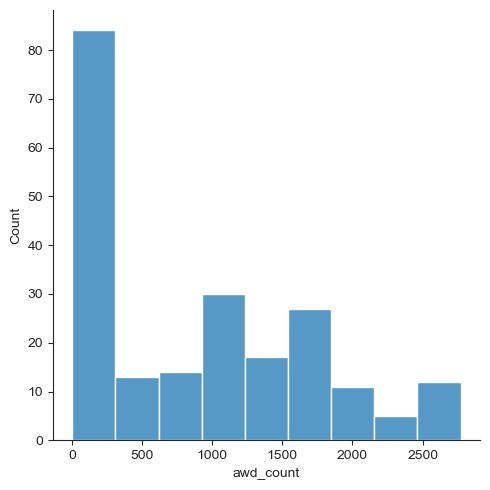

In [33]:
sns.displot(data=awards_summary_df, kind='hist', x='awd_count')

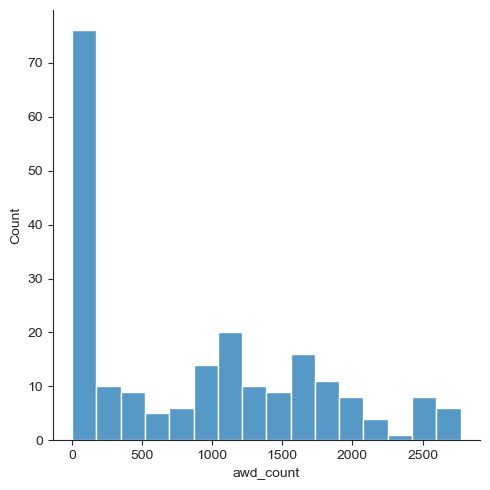

In [34]:
sns.displot(data=awards_summary_df, kind='hist', x='awd_count', bins=16)

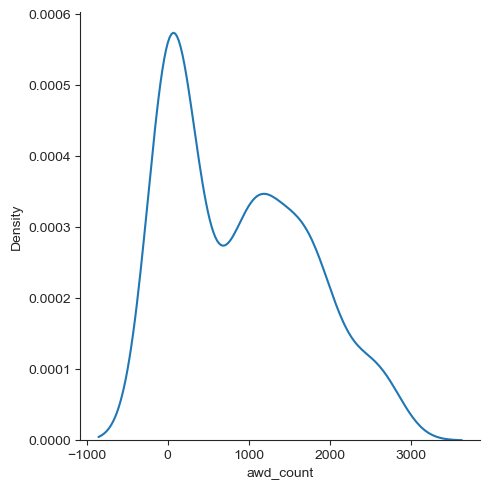

In [35]:
sns.displot(data=awards_summary_df, kind='kde', x='awd_count')

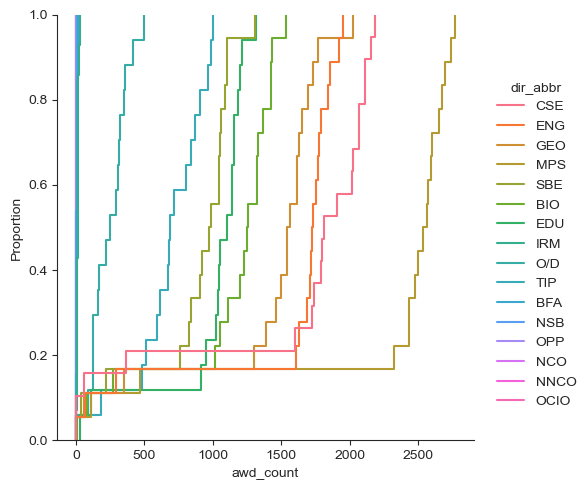

In [36]:
sns.displot(data=awards_summary_df, kind='ecdf', x='awd_count', hue='dir_abbr')

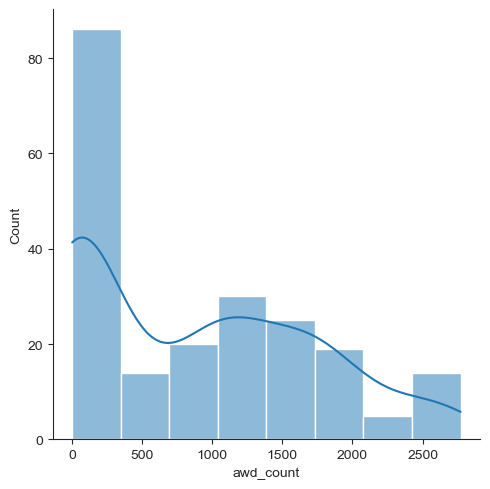

In [37]:
sns.displot(data=awards_summary_df, kind='hist', 
            x='awd_count', kde=True, bins=8)

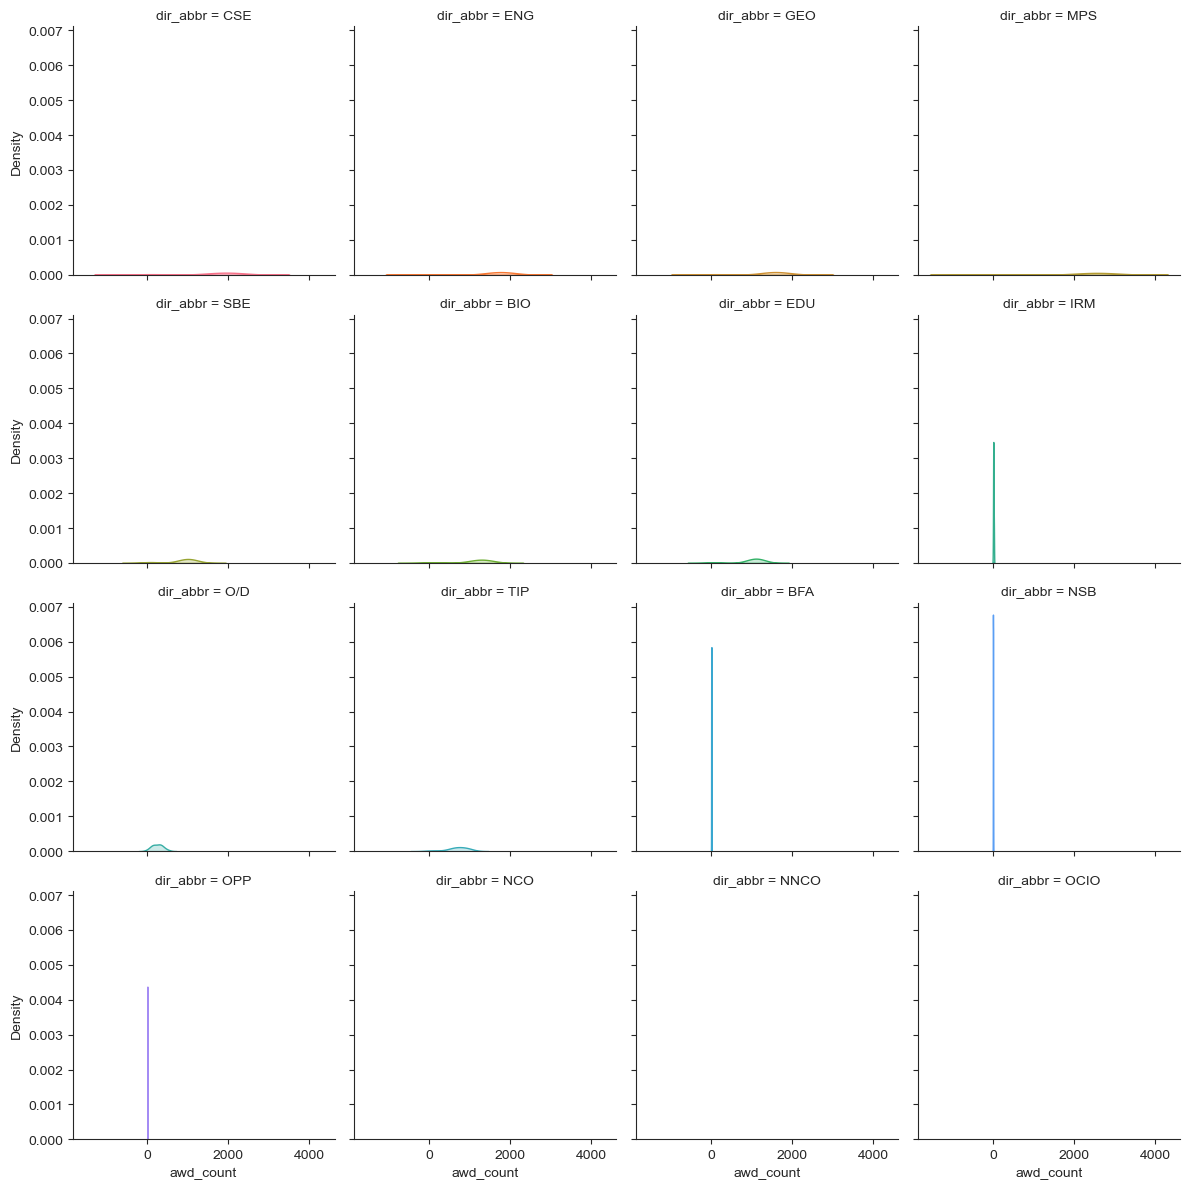

In [38]:
sns.displot(data=awards_summary_df, kind='kde', x='awd_count', hue='dir_abbr', 
            fill=True, col='dir_abbr', col_wrap=4, height=3, legend=False, warn_singular=False)

## Other techniques for enhancing a plot

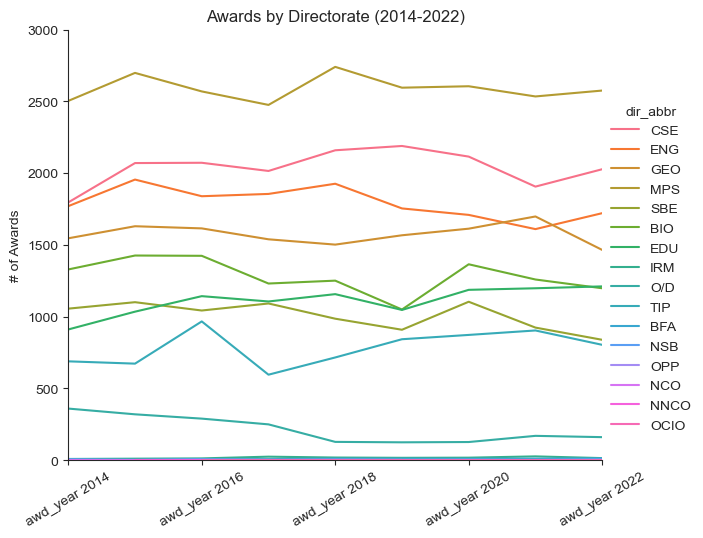

In [39]:
g = sns.relplot(
    data=awards_summary_df, 
    kind='line', x='awd_year', y='awd_count', hue='dir_abbr', aspect=1.25)
for ax in g.axes.flat:
    ax.set_title('Awards by Directorate (2014-2022)')
    ax.set_xlabel('')
    ax.set_xticks([x for x in range(2014,2023,2)])
    ax.set_xticklabels(['awd_year ' + str(x) for x in range(2014,2023,2)])
    ax.tick_params('x', labelrotation=30)
    ax.set_ylabel('# of Awards')
    ax.set_xlim(2014,2022)
    ax.set_ylim(0,3000)

Text(2021, 3000, 'COVID Pandemic')

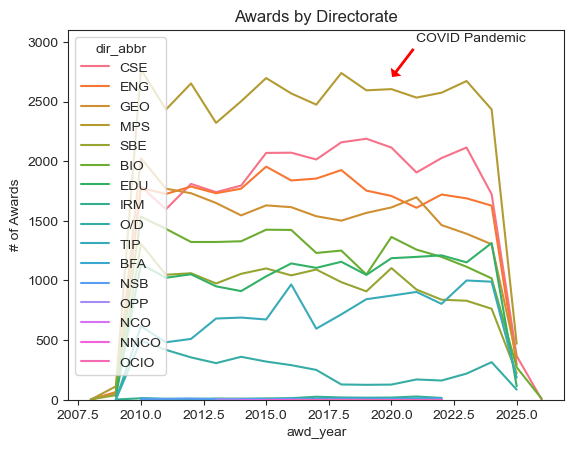

In [40]:
ax = sns.lineplot(data=awards_summary_df, 
                  x='awd_year', y='awd_count', hue='dir_abbr')
ax.set_title('Awards by Directorate')
ax.set_ylabel('# of Awards')
ax.set_ylim(0,3100)
ax.annotate(text='COVID Pandemic', 
    xy=(2020, 2700), xytext=(2021, 3000), 
    arrowprops=dict(facecolor='red', width=3, headwidth=12, headlength=6))

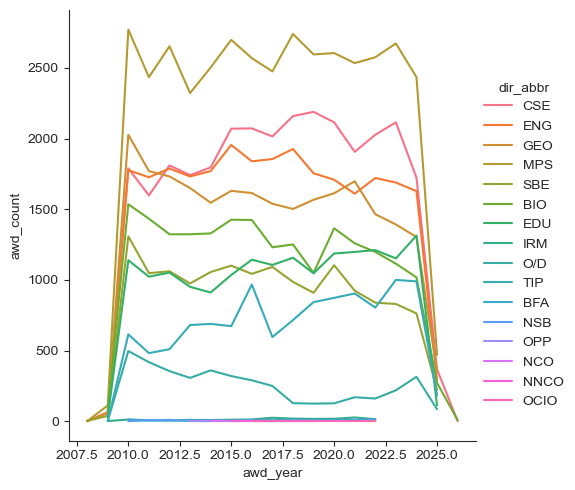

In [41]:
colors = ['black','red','orange','blue', 'green','purple','pink','brown']
sns.set_palette(sns.color_palette(colors))
sns.relplot(data=awards_summary_df, kind='line',
            x='awd_year', y='awd_count', hue='dir_abbr')

In [42]:
sns.set_palette(sns.color_palette('tab10'))

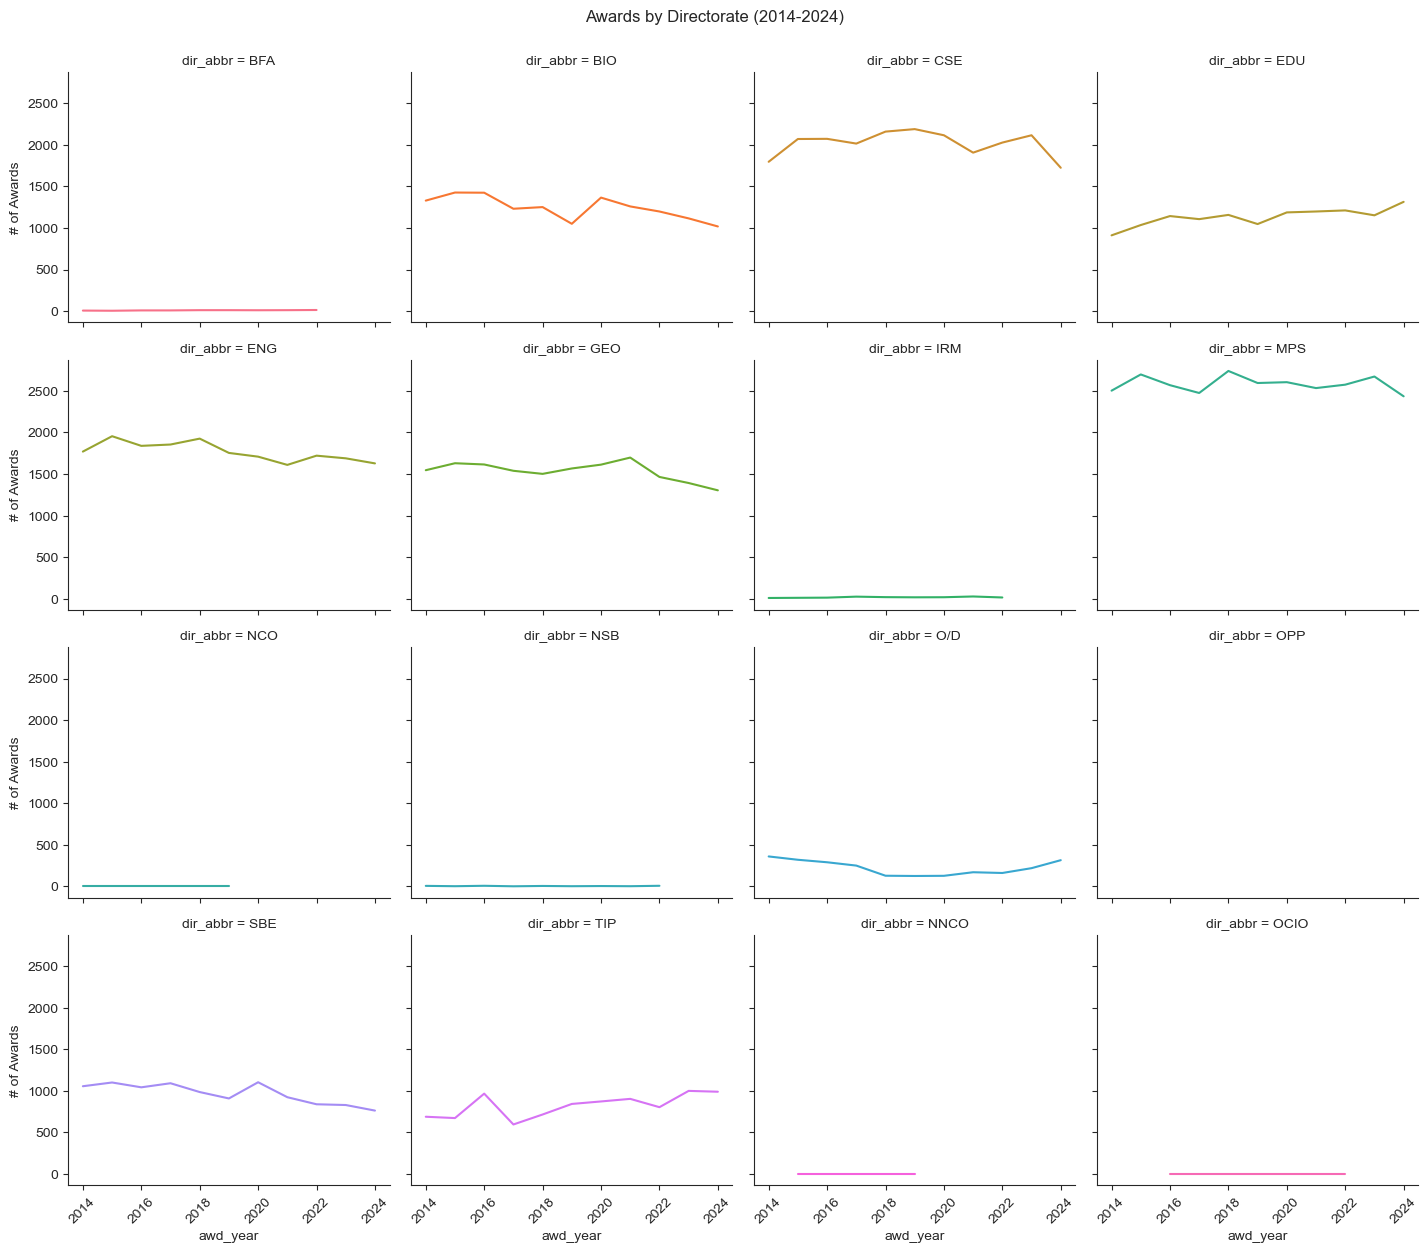

In [43]:
g = sns.relplot(
    data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'),
    kind='line', x='awd_year', y='awd_count', hue='dir_abbr', legend=False,
    col='dir_abbr', col_wrap=4, height=3, aspect=1.2)
g.fig.suptitle('Awards by Directorate (2014-2024)', y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('# of Awards')
    ax.set_xticks([x for x in range(2014, 2025, 2)])
    ax.tick_params('x', labelrotation=45)   

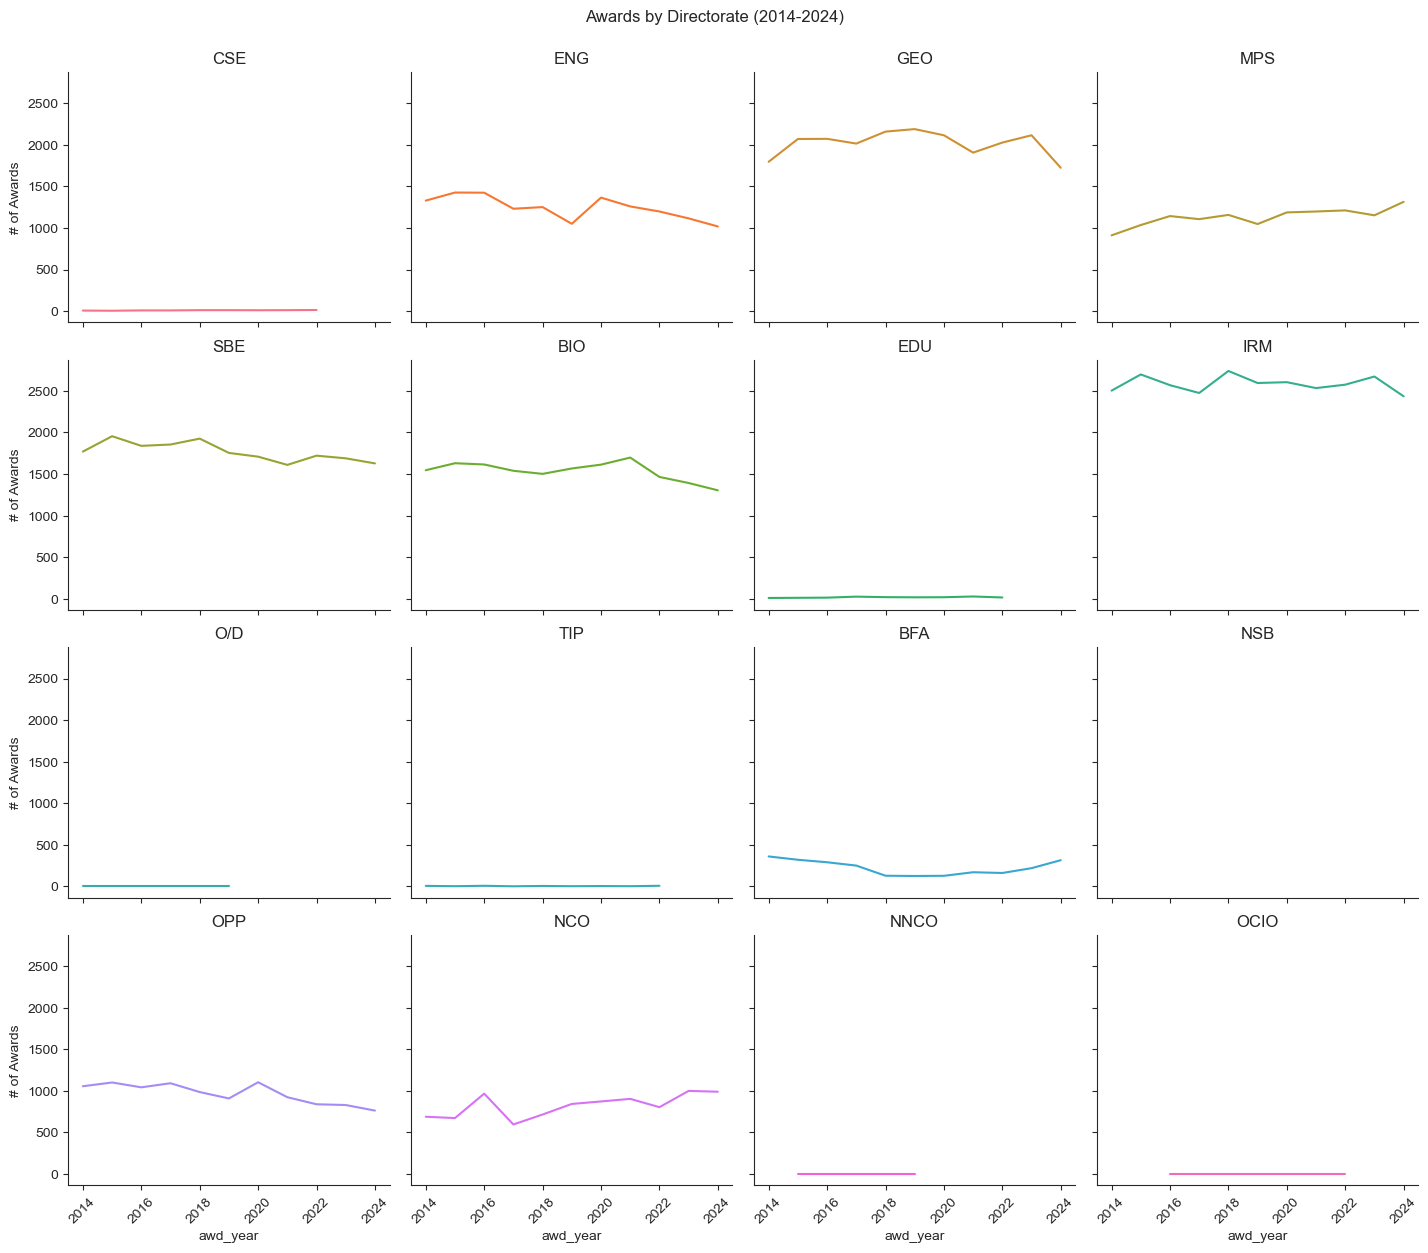

In [44]:
g = sns.relplot(
    data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'), 
    kind='line', x='awd_year', y='awd_count', hue='dir_abbr', legend=False, 
    col='dir_abbr', col_wrap=4, height=3, aspect=1.2)
g.fig.suptitle('Awards by Directorate (2014-2024)', y=1.025)
dir_abbrs = awards_summary_df['dir_abbr'].drop_duplicates().tolist()
for index, ax in enumerate(g.axes.flat):
    ax.set_title(dir_abbrs[index])
    ax.set_ylabel('# of Awards')
    ax.set_xticks([x for x in range(2014, 2025, 2)])
    ax.tick_params('x', labelrotation=45)

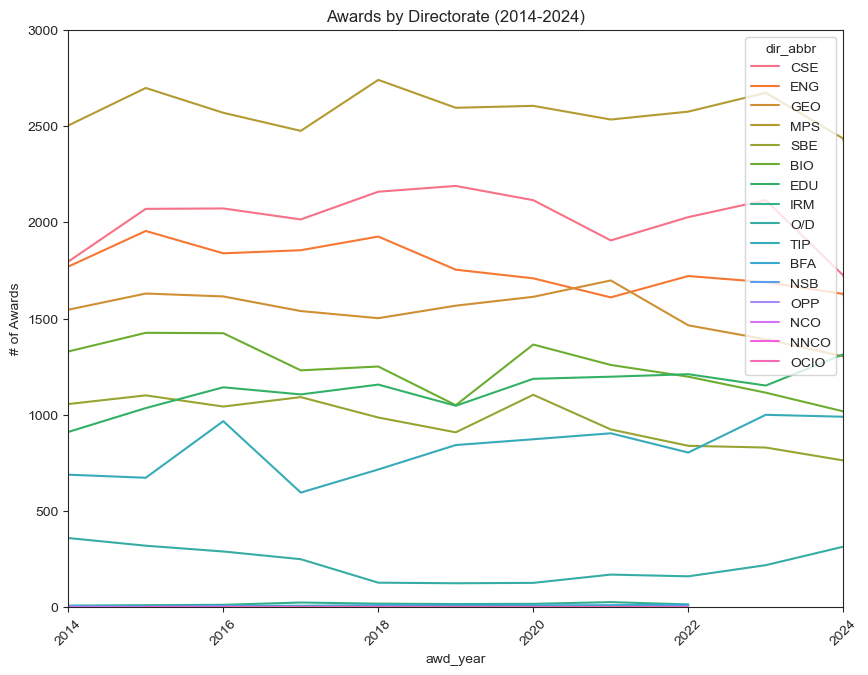

In [45]:
# import a Matplotlib module and set the figure size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7.5)) 

# create the line plot
sns.lineplot(data=awards_summary_df, x='awd_year', y='awd_count', hue='dir_abbr')

# use the ax and fig objects to enhance and save the plot
ax.set(title='Awards by Directorate (2014-2024)', 
    ylabel='# of Awards', 
    xticks=[x for x in range(2014, 2025, 2)], 
    xlim=(2014,2024), ylim=(0,3000)),
ax.tick_params('x', labelrotation=45)

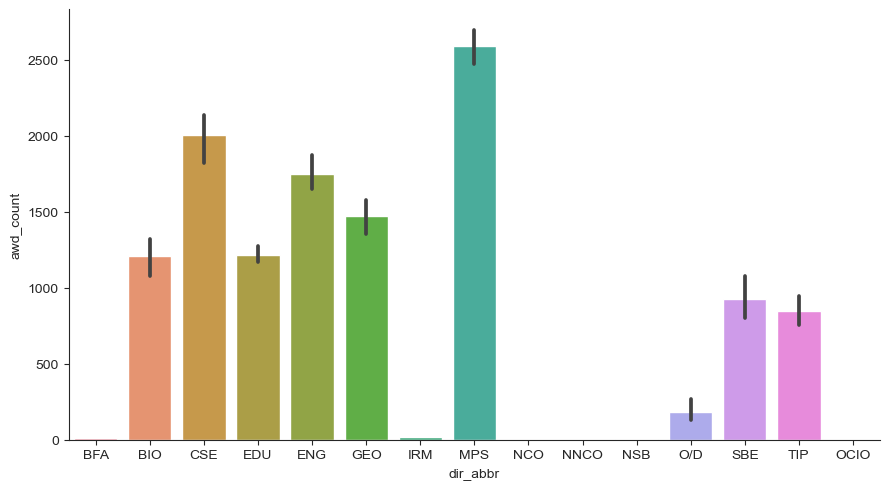

In [46]:
sns.catplot(data=awards_summary_df.query('awd_year in (2018, 2020, 2022, 2024)'), 
            kind='bar', x='dir_abbr', y='awd_count', aspect=1.8)

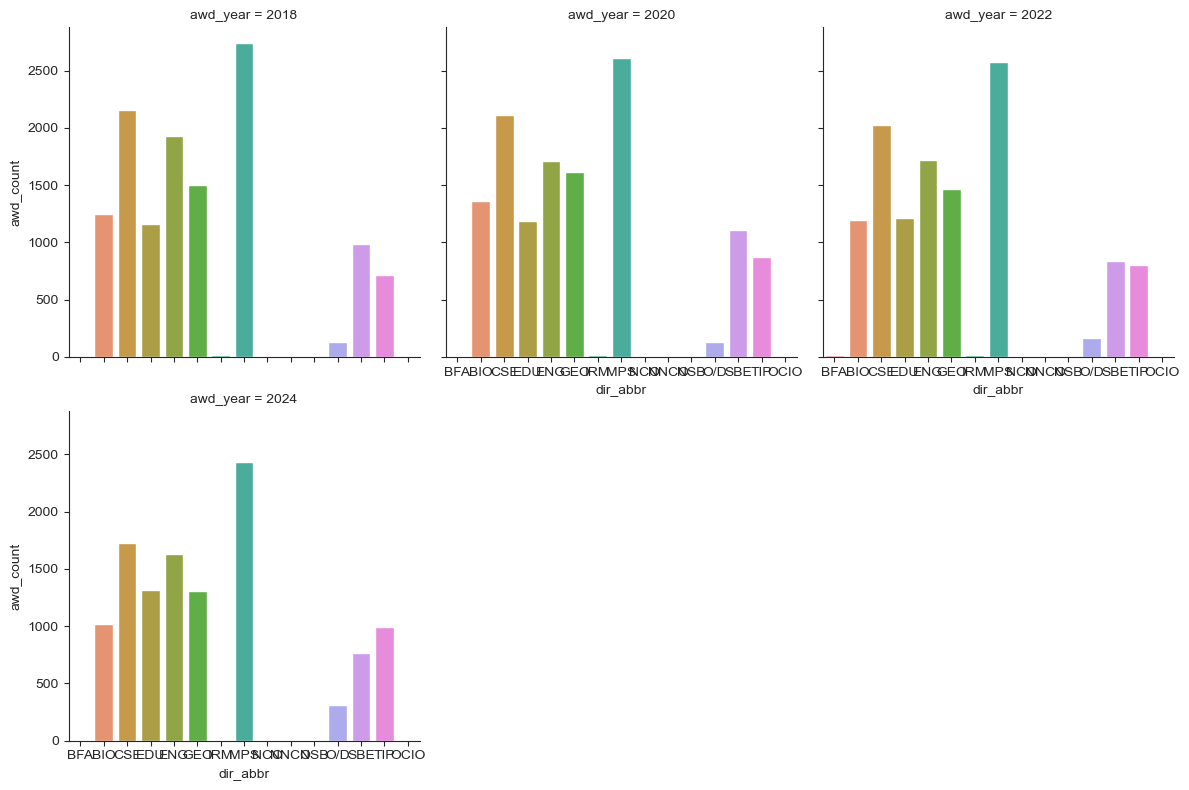

In [47]:
sns.catplot(data=awards_summary_df.query('awd_year in (2018,2020,2022,2024)'),
            kind='bar', x='dir_abbr', y='awd_count', height=4,
            col='awd_year', col_wrap=3)

[Text(0.5, 1.0, 'MPS'), Text(0, 0.5, '# of Awards')]

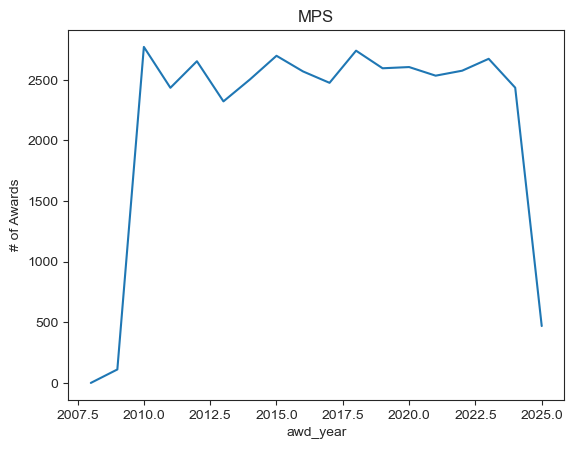

In [48]:
ax = sns.lineplot(data=awards_summary_df.query('dir_abbr == "MPS"'), x='awd_year', y='awd_count')
ax.set(title = 'MPS', ylabel='# of Awards')

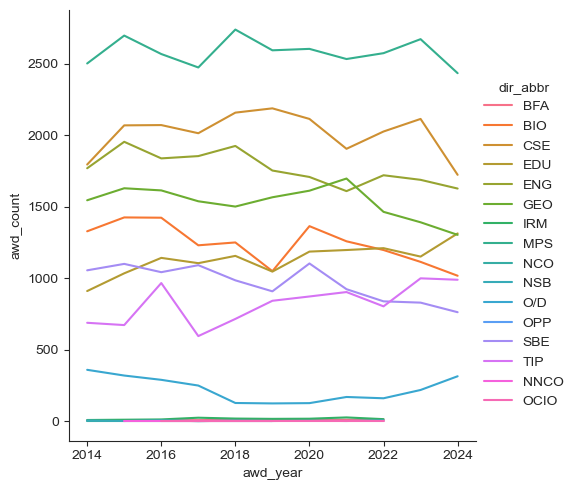

In [49]:
sns.relplot(data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'), kind='line',
            x='awd_year', y='awd_count', hue='dir_abbr')

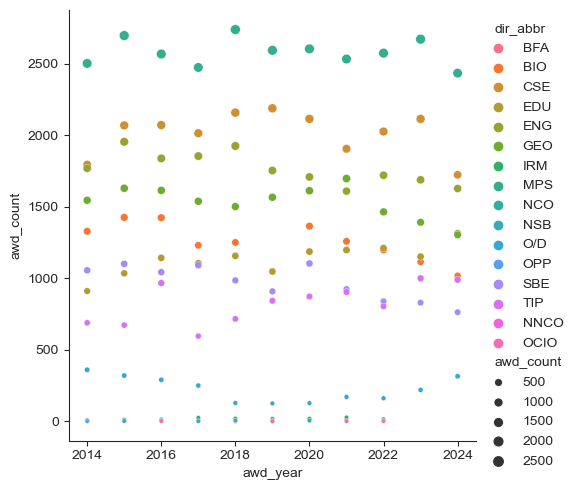

In [50]:
sns.relplot(data=awards_summary_df.query('awd_year >= 2014 and awd_year <= 2024'), kind='scatter',
            x='awd_year', y='awd_count', hue='dir_abbr', size='awd_count', sizes=(10,50))

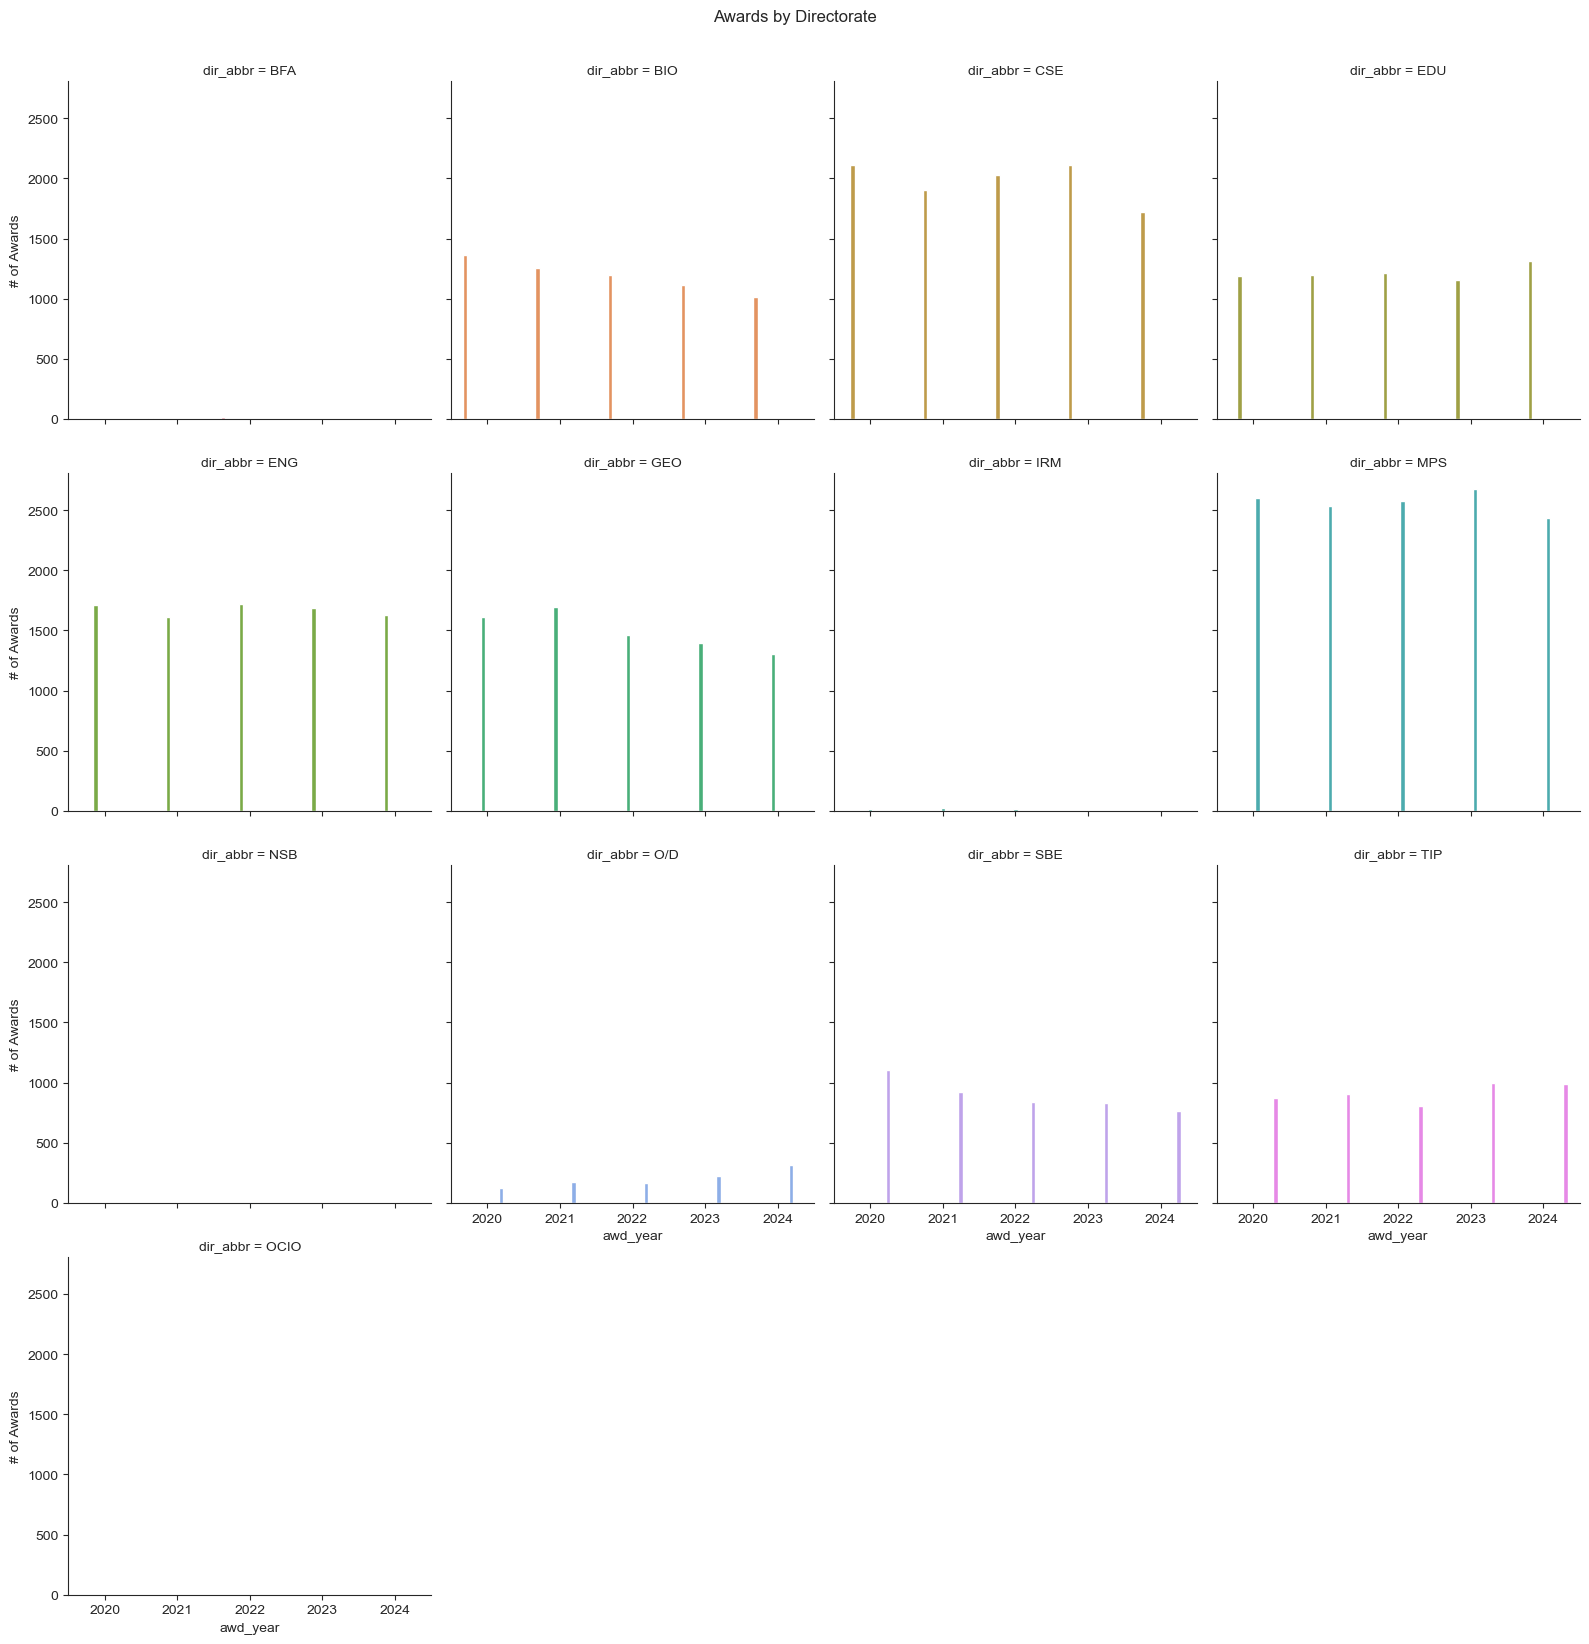

In [51]:
g = sns.catplot(data=awards_summary_df.query('awd_year in (2020,2021,2022,2023,2024)'),
               kind='bar', x='awd_year', y='awd_count', hue='dir_abbr', legend=False,
               col='dir_abbr', col_wrap=4, height=4)
g.fig.suptitle('Awards by Directorate', y=1.025)
for ax in g.axes.flat:
    ax.set(ylabel='# of Awards')
g.savefig('barCharts.png')

## Let's do one more quick one with award type by month

In [52]:
# Read the awards_with_type_df DataFrame back from the pickle file
awards_with_type_df = pd.read_pickle(f'{data_dir}/pkl_files/awards_with_type_df.pkl')

In [53]:
# Generate an 'awd_month_and_year' column
awards_with_type_df['awd_month_and_year'] = awards_with_type_df['awd_eff_date'].dt.to_period('M').astype(str)

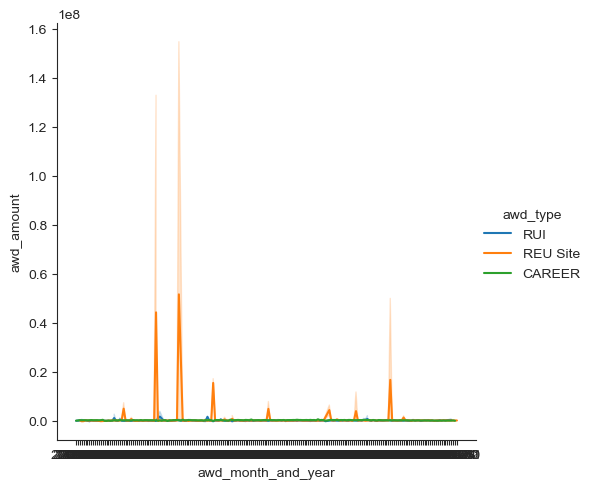

In [54]:
sns.relplot(data=awards_with_type_df, kind='line',
            x='awd_month_and_year', y='awd_amount', hue='awd_type')